In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [ ]:
!wget 'https://raw.githubusercontent.com/LahiruTjay/Machine-Learning-With-Python/master/datasets/diabetes.csv'

--2024-08-30 19:02:16--  https://raw.githubusercontent.com/LahiruTjay/Machine-Learning-With-Python/master/datasets/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23875 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.32K  --.-KB/s    in 0.002s  

2024-08-30 19:02:17 (11.2 MB/s) - ‘diabetes.csv’ saved [23875/23875]



In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [ ]:
diabetes.groupby('Outcome').size()

,0
Outcome,
0,500
1,268


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

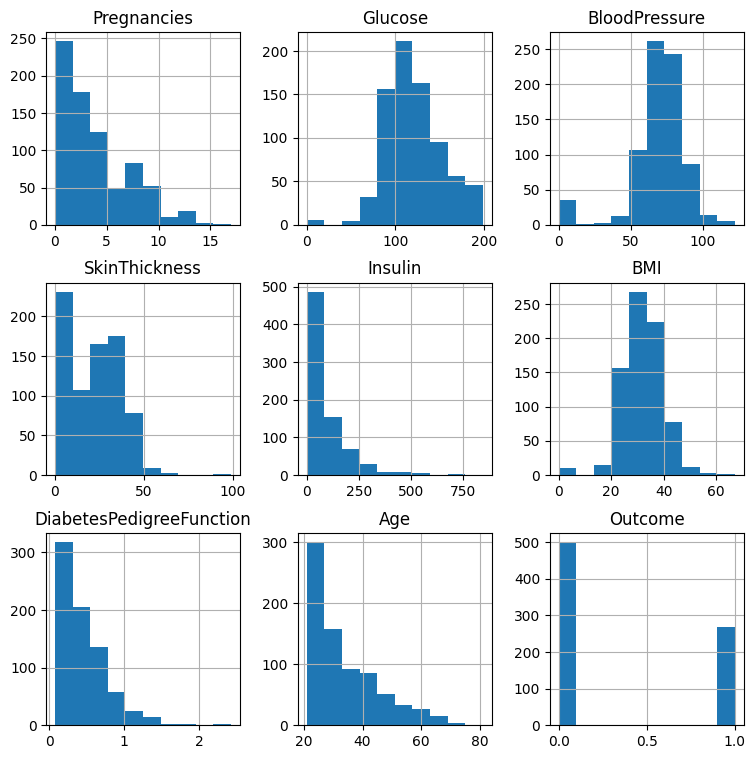

In [ ]:
diabetes.hist(figsize=(9, 9))

,0
Outcome,
0,"[[Axes(0.125,0.666111;0.215278x0.213889), Axes..."
1,"[[Axes(0.125,0.666111;0.215278x0.213889), Axes..."


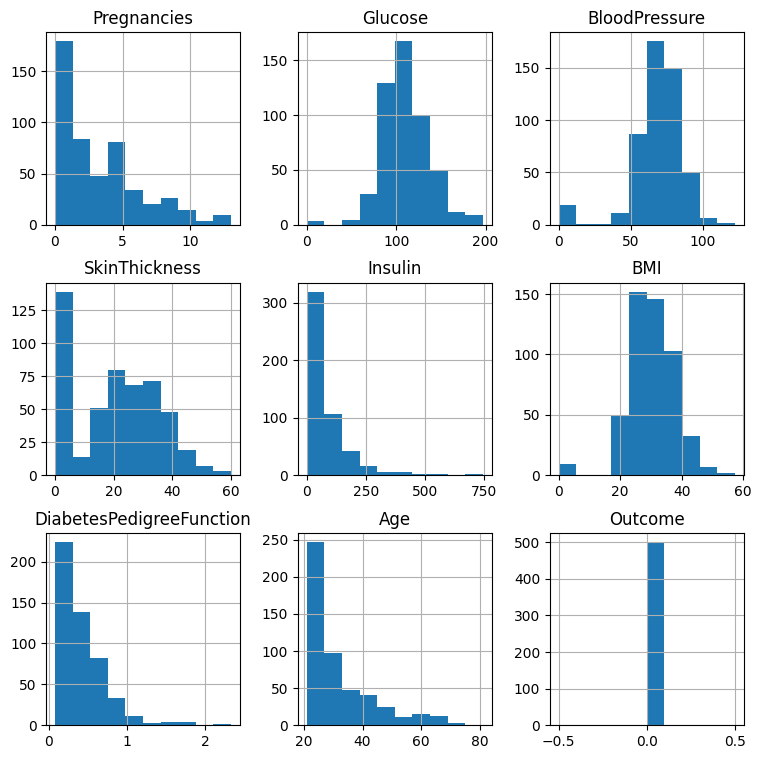

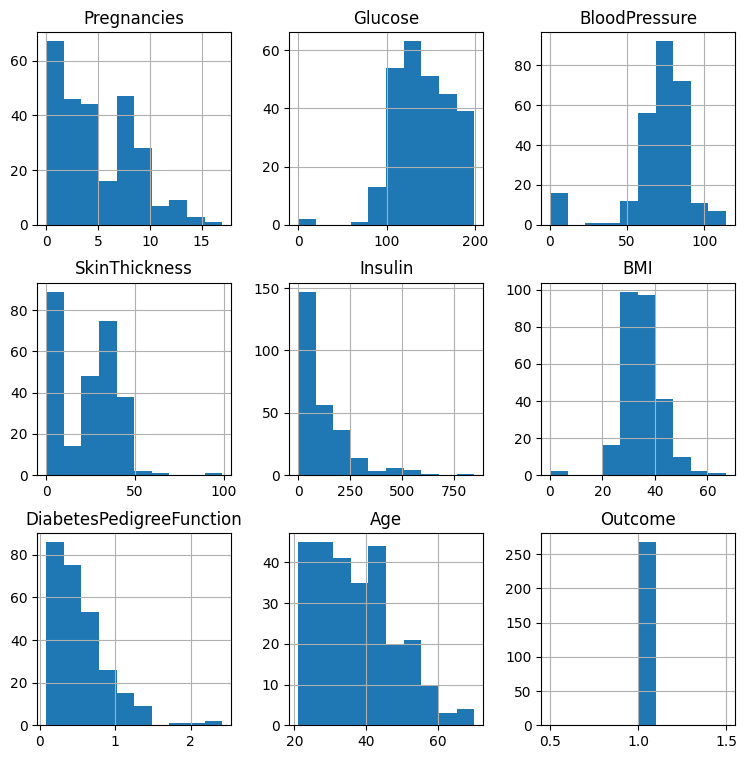

In [ ]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())

Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [ ]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [ ]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())

Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [ ]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [ ]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [ ]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [ ]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))

In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.779006
3   DT  0.729282
4  GNB  0.734807
5   RF  0.773481
6   GB  0.773481


In [ ]:
strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []

for name, model in models:

    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.714136
1  SVC  0.755651
2   LR  0.772165
3   DT  0.690811
4  GNB  0.754205
5   RF  0.772260
6   GB  0.759798


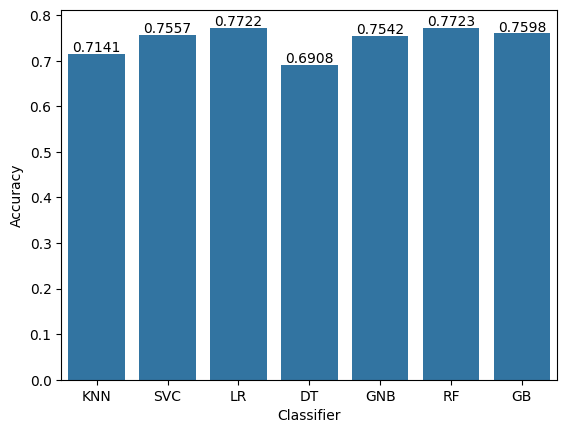

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()

In [ ]:
from sklearn.feature_selection import RFECV

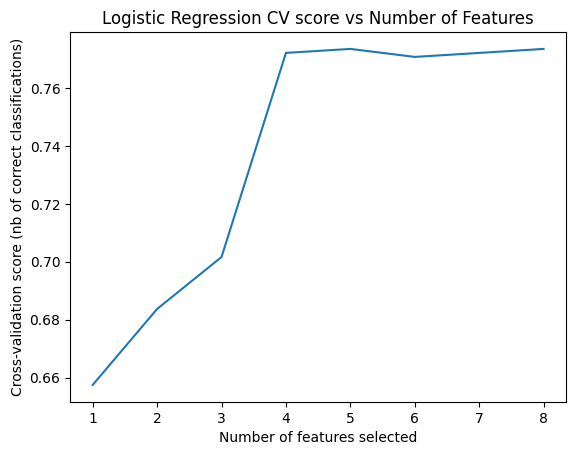

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

# Define Stratified K-Folds cross-validator
strat_k_fold = StratifiedKFold(n_splits=5)

# Perform RFECV
rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

# Plot the number of features vs. cross-validation scores
plt.figure()
plt.title('Logistic Regression CV score vs Number of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
feature_importance = list(zip(feature_names, rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])

print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
# Calculate accuracy scores
X_new = diabetes_mod[new_features]

initial_score = cross_val_score(logreg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(logreg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7734961685823755 
Accuracy after Feature Selection : 0.7734961685823755 


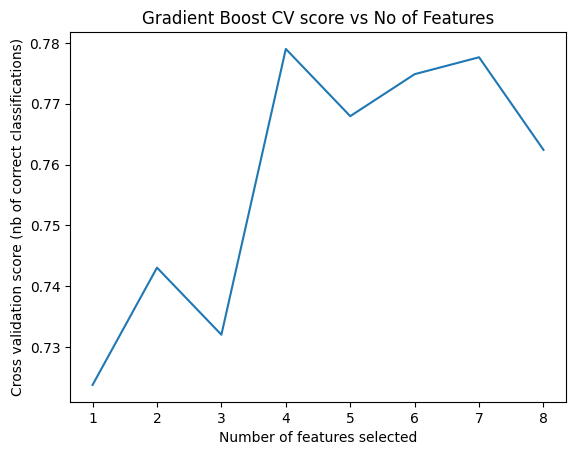

In [ ]:
gb_model = GradientBoostingClassifier()

gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(X, y)

plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.cv_results_['mean_test_score']) + 1), gb_rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])

print(new_features)

['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
X_new_gb = diabetes_mod[new_features]

initial_score = cross_val_score(gb_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(gb_model, X_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7624137931034483 
Accuracy after Feature Selection : 0.7789942528735632 


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Specify parameters
c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy')
grid.fit(X_new, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 2, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=2, multi_class='ovr', solver='newton-cg')


In [ ]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')
initial_score = cross_val_score(logreg_new, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.7734961685823756 
